In [1]:
#load Dependencies
%matplotlib inline
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Create Database Engine
databasekey = os.environ.get('keysql')
dbuser = 'postgres'
dbpassword = databasekey
dbhost = 'localhost'
dbport = '5432'
dbname= 'employee'

engine = create_engine(f"postgres://{dbuser}:{dbpassword}@{dbhost}:{dbport}/{dbname}")

In [3]:
#Load Salary Database into Dataframe
salary = pd.read_sql_table('salaries', con=engine)

In [4]:
#Load Title Database into Dataframe
title = pd.read_sql_table('titles', con=engine)

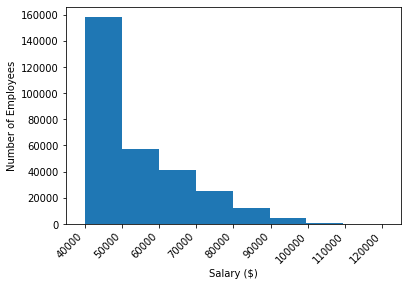

In [5]:
#Create Histogram of Salary Ranges for Employees
salary.hist(column='salary', bins=9, grid=False)
plt.title('')
plt.xlabel('Salary ($)')
plt.ylabel('Number of Employees')
plt.xlim(35000,125000)
plt.xticks(rotation=45, ha='right')
plt.savefig('images/salaryhistogram.png')

In [6]:
#Check Salary Table for Duplicates
salarydups = salary[salary.duplicated(['emp_no'], keep=False)]
salarydups

Empty DataFrame
Columns: [emp_no, salary, from_date, to_date]
Index: []

In [7]:
#Check Title Table for Duplicates
titledups = title[title.duplicated(['emp_no'], keep=False)]
titledups

emp_no            title  from_date    to_date
3        10004         Engineer 1986-12-01 1995-12-01
4        10004  Senior Engineer 1995-12-01        NaT
5        10005     Senior Staff 1996-09-12        NaT
6        10005            Staff 1989-09-12 1996-09-12
8        10007     Senior Staff 1996-02-11        NaT
...        ...              ...        ...        ...
443302  499996  Senior Engineer 2002-05-13        NaT
443303  499997         Engineer 1987-08-30 1992-08-29
443304  499997  Senior Engineer 1992-08-29        NaT
443305  499998     Senior Staff 1998-12-27        NaT
443306  499998            Staff 1993-12-27 1998-12-27

[283554 rows x 4 columns]

In [8]:
#Merge Salary and Title Dataframes into one Dataframe
salarytitle = pd.merge(salary[['emp_no','from_date','salary']], title[['emp_no','from_date','title']], on=['emp_no', 'from_date'])
salarytitle.isnull().values.any()

False

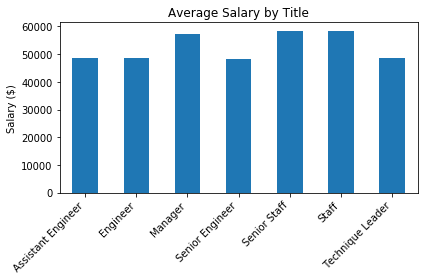

In [9]:
#Create a Bar Chart of Average Salary by Title
salarytitle.groupby('title')['salary'].mean().plot(kind='bar')
plt.ylabel('Salary ($)')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.title('Average Salary by Title')
plt.tight_layout()
plt.savefig('images/avgsalary.png')

In [10]:
#Lookup Employee Salary 
emp499942 = salarytitle.loc[salarytitle['emp_no']==499942] 
emp499942

emp_no  from_date  salary             title
299966  499942 1998-03-28   40000  Technique Leader